# IBM Data Science and Machine Learning Capstone Project
# Question 3
# What Is the Relationship between Housing Characteristics and Complaints?

# Data Ingestion

In [116]:
#Bucket and Credentials

#import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
#def __iter__(self): return 0

client_cred = ibm_boto3.client(service_name='s3',
ibm_api_key_id='rA-GmnuRkJ81A9EsDqha63ZmdFzQjxwCEgASTF2F-OJr',
ibm_auth_endpoint='https://iam.cloud.ibm.com/oidc/token',
config=Config(signature_version='oauth'),
endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

bucket = 'ibmdatascienceandmachinelearningc-donotdelete-pr-bkscl1den6u69w'

In [117]:
# Download NYC 311 Calls Dataset
client_cred.download_file(Bucket=bucket, Key='df_raw_cos.pkl', Filename='./df_raw_local.pkl')
df1 = pd.read_pickle('./df_raw_local.pkl')

# Download NYC PLUTO file Bronx
client_cred.download_file(Bucket=bucket, Key='df_data_5_raw_cos.pkl', Filename='./df1.pkl')
df_BX = pd.read_pickle('./df1.pkl')

In [118]:
df_buildings = df_BX[["Address", "BldgArea", "BldgDepth", "BuiltFAR", "CommFAR", 
                "FacilFAR", "Lot", "LotArea", "LotDepth", "NumBldgs", "NumFloors",
                "OfficeArea", "ResArea", "ResidFAR", "RetailArea", "YearBuilt",
                "YearAlter1", "ZipCode", "YCoord", "XCoord"]]

In [119]:
df_complaints = df1[df1["complaint_type"] == "HEAT/HOT WATER"]
df_complaints = df_complaints[df_complaints["borough"] == "BRONX"]
df_complaints.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
121,2020-07-02T16:22:15.000,46722532,HEAT/HOT WATER,10456.0,1420 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.839248,-73.913448,NaN,RESIDENTIAL BUILDING,Open
129,2020-07-02T16:23:58.000,46722512,HEAT/HOT WATER,10456.0,1420 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.839248,-73.913448,NaN,RESIDENTIAL BUILDING,Open
172,2020-07-02T10:59:50.000,46721686,HEAT/HOT WATER,10453.0,1920 HENNESSY PLACE,HENNESSY PLACE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.854620,-73.915268,NaN,RESIDENTIAL BUILDING,Open
213,2020-07-02T07:56:56.000,46721235,HEAT/HOT WATER,10454.0,331 EAST 132 STREET,EAST 132 STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.806022,-73.927612,NaN,RESIDENTIAL BUILDING,Open
227,2020-07-02T20:30:33.000,46721027,HEAT/HOT WATER,10453.0,161 EAST 179 STREET,EAST 179 STREET,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.851333,-73.905701,NaN,RESIDENTIAL BUILDING,Open


In [120]:
df_buildings.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


# Quiz on Correlation

In [121]:
#Question 1: Can you determine the age of the building from the PLUTO dataset?
df_houses["YearBuilt"].head()

0       0
1    1931
2    1931
3    1931
4    1920
Name: YearBuilt, dtype: int64

In [122]:
# Question 2: The cardinality of the data in PLUTO dataset is at the same level as the complaint dataset?
# Complaint dataset: 1 row per complaint (only "unique-key" has to be different through rows)
# Buildings dataset: 1 row per address (only "Address" has to be different through rows)

# What Is the Relationship between Housing Characteristics and Complaints?

In [123]:
# xploratory analysis
df_complaints["complaint_type"].value_counts()

HEAT/HOT WATER    431906
Name: complaint_type, dtype: int64

In [124]:
# Get only the columns I want to merge
df_comp = df_complaints[["incident_address", "longitude", "latitude"]]
df_comp.rename(columns={'incident_address':'Address', "longitude":"Longitude", "latitude":"Latitude"}, inplace=True)
df_comp["Complaint"] = "1"
df_comp.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Address,Longitude,Latitude,Complaint
121,1420 GRAND CONCOURSE,-73.913448,40.839248,1
129,1420 GRAND CONCOURSE,-73.913448,40.839248,1
172,1920 HENNESSY PLACE,-73.915268,40.854620,1
213,331 EAST 132 STREET,-73.927612,40.806022,1
227,161 EAST 179 STREET,-73.905701,40.851333,1


In [125]:
# Merge dataframes
df = pd.merge(df_buildings, df_comp, how="left", on="Address") #Merge two dataframes (default inner)
df.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,Longitude,Latitude,Complaint
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,...,6.02,0,0,0,10454.0,232162.0,1005957.0,NaN,NaN,NaN
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,...,6.02,0,1931,1994,10454.0,232156.0,1006076.0,NaN,NaN,NaN
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,...,6.02,0,1931,0,10454.0,232036.0,1006187.0,NaN,NaN,NaN
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,6.02,0,1931,2001,10454.0,232033.0,1006299.0,-73.920245,40.803778,1
4,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,6.02,0,1931,2001,10454.0,232033.0,1006299.0,-73.920245,40.803778,1


In [126]:
#Fill NaN values with 0 in column Complaint
df["Complaint"].fillna(value=0, inplace=True)
df.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,Longitude,Latitude,Complaint
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,...,6.02,0,0,0,10454.0,232162.0,1005957.0,NaN,NaN,0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,...,6.02,0,1931,1994,10454.0,232156.0,1006076.0,NaN,NaN,0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,...,6.02,0,1931,0,10454.0,232036.0,1006187.0,NaN,NaN,0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,6.02,0,1931,2001,10454.0,232033.0,1006299.0,-73.920245,40.803778,1
4,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,6.02,0,1931,2001,10454.0,232033.0,1006299.0,-73.920245,40.803778,1


In [127]:
df["Complaint"] = df["Complaint"].astype(int) #So all complaint values are int
df["Complaint"].value_counts() #It seems there are more houses that complaint than those which don´t in Bronx

1    326750
0     75772
Name: Complaint, dtype: int64

In [208]:
print(df.shape)
df2 = df.drop(["YCoord", "XCoord", "Longitude", "Latitude", "Address"], axis=1)
print(df2.shape)
df2 = df2.dropna()
print(df2.shape)
df2 = df2.sample(frac=1, random_state=1)[0:10000]
print(df2.shape)
df2["Complaint"].value_counts()

(402522, 23)
(402522, 18)
(402193, 18)
(10000, 18)


1    8121
0    1879
Name: Complaint, dtype: int64

In [209]:
df2.corr()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,Complaint
BldgArea,1.000000,0.292775,0.539506,-0.009487,0.198784,0.156556,0.546089,0.458448,0.645369,0.532557,0.125834,0.994781,0.180715,0.113499,0.070752,0.097589,-0.044643,0.221729
BldgDepth,0.292775,1.000000,0.131520,0.008387,0.380661,-0.077889,0.154839,0.427132,0.000317,0.393273,0.116358,0.281512,0.364432,0.185439,0.266570,0.186537,-0.190426,0.447065
BuiltFAR,0.539506,0.131520,1.000000,-0.005333,0.200435,0.229546,0.002655,0.010252,0.676949,0.259462,-0.005304,0.546391,0.181421,0.046864,0.083654,0.062810,-0.083340,0.242323
CommFAR,-0.009487,0.008387,-0.005333,1.000000,0.112401,0.011224,0.019074,0.023479,-0.002337,-0.040754,0.027827,-0.020176,0.008347,0.099992,-0.099565,0.068489,-0.031892,-0.047855
FacilFAR,0.198784,0.380661,0.200435,0.112401,1.000000,0.004795,0.027840,0.067394,-0.059847,0.394949,0.041595,0.199464,0.868820,0.106038,0.076947,0.159333,-0.435228,0.477672
Lot,0.156556,-0.077889,0.229546,0.011224,0.004795,1.000000,0.084215,0.030694,0.204690,0.065333,0.002624,0.144652,-0.009983,0.183791,0.008038,-0.042407,0.001325,0.003040
LotArea,0.546089,0.154839,0.002655,0.019074,0.027840,0.084215,1.000000,0.540524,0.306303,0.265074,0.113187,0.537122,0.025089,0.087687,-0.033367,0.053386,0.026666,0.057257
LotDepth,0.458448,0.427132,0.010252,0.023479,0.067394,0.030694,0.540524,1.000000,0.203311,0.325398,0.168568,0.438232,0.057618,0.105248,-0.004124,0.047181,-0.008465,0.078853
NumBldgs,0.645369,0.000317,0.676949,-0.002337,-0.059847,0.204690,0.306303,0.203311,1.000000,0.077088,0.035914,0.650218,-0.062501,-0.003252,0.127234,0.009196,0.040597,-0.015496
NumFloors,0.532557,0.393273,0.259462,-0.040754,0.394949,0.065333,0.265074,0.325398,0.077088,1.000000,0.029084,0.525654,0.351318,0.085661,0.260045,0.159790,-0.162510,0.518261


It seems that NumFloors, FacilFAR, ResidArea, and BldgDepth have corrlation with Complaint

# Predict Complaint Types

# Question 4
# Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?

This is a classification problem, so classification algorythms will be used for model development

In [210]:
X = df2.drop(["Complaint"], axis=1)
y = df2["Complaint"]

In [211]:
display(X.head())
X.shape

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode
193764,87000,157.00,5.22,0.0,4.8,1,16675,166.74,1,6.0,0,87000,2.43,0,1928,2003,10468.0
166564,70110,138.08,3.79,0.0,6.5,43,18480,138.67,1,6.0,0,70110,6.02,0,1928,0,10453.0
58171,1740,45.00,1.56,0.0,4.8,25,1112,67.84,1,2.0,0,1740,3.44,0,1901,0,10455.0
401018,1854,38.50,0.78,0.0,1.0,787,2375,95.00,1,2.5,0,1854,0.60,0,1935,0,10471.0
296349,2875,55.00,1.13,0.0,2.0,19,2550,100.00,1,3.0,0,2250,1.25,625,1928,2008,10462.0


(10000, 17)

In [212]:
# Normalize input data
from sklearn import preprocessing
X_std = preprocessing.StandardScaler().fit_transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [213]:
# We split the X into train and test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_std, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (8000, 17) (8000,)
Validation set: (2000, 17) (2000,)


K-nearest Neighbours

.3f


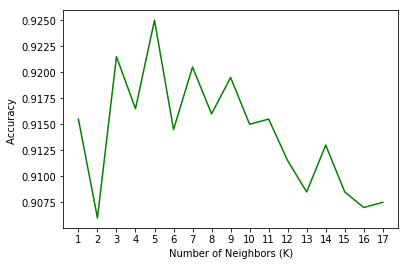

In [214]:
Ks = 17
acc = np.zeros(Ks)

for n in range(1, Ks+1):
    neigh = KNeighborsClassifier(n_neighbors = n)
    neigh.fit(X_train, y_train)
    yhat=neigh.predict(X_val)
    acc[n-1] = metrics.accuracy_score(y_val, yhat)
print(".3f" %acc)

plt.plot(range(1, Ks+1), acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.xticks(range(1, Ks+1))
plt.show()

k=5 is the best hyperparameter for KNN

In [215]:
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier

k = 5
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train, y_train)
yhat = neigh.predict(X_val)
#print(yhat[0:5])

f1_KNN = metrics.f1_score(y_val, yhat, average="weighted")
print("F1-score: %.3f" % f1_KNN)
Acc_KNN = metrics.accuracy_score(y_val, yhat)
print("Accuracy: %.3f" % Acc_KNN)

F1-score: 0.924
Accuracy: 0.925


Decision Tree

In [216]:
from sklearn.tree import DecisionTreeClassifier

[0.902  0.914  0.9135 0.9165 0.9245 0.923  0.9275 0.925  0.93   0.931
 0.923  0.9205 0.9165 0.92   0.9175 0.919  0.9205]


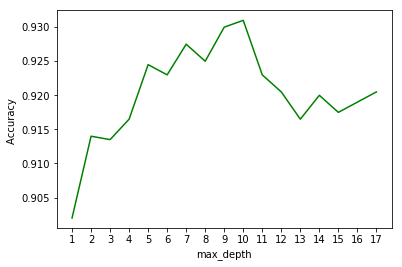

In [217]:
Ks = 17
acc = np.zeros(Ks)

for n in range(1, Ks+1):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=n)
    drugTree.fit(X_train, y_train)
    yhat=drugTree.predict(X_val)
    acc[n-1] = metrics.accuracy_score(y_val, yhat)
print(acc)

plt.plot(range(1, Ks+1), acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('max_depth')
plt.xticks(range(1, Ks+1))
plt.show()

max_depth = 10 is the best hyperparameter for Decision Tree

In [218]:
y_train = y_train.astype("int")
max_depth = 10
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
drugTree.fit(X_train, y_train)
yhat = drugTree.predict(X_val)
Acc_DT = metrics.accuracy_score(y_val, yhat)
print("Accuracy: %.3f" % Acc_DT)

Accuracy: 0.929


In [219]:
#%%capture
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [220]:
print(type(y_train.iloc[3]))
y_train = y_train.astype("str")
print(type(y_train.iloc[3]))

<class 'numpy.int64'>
<class 'str'>


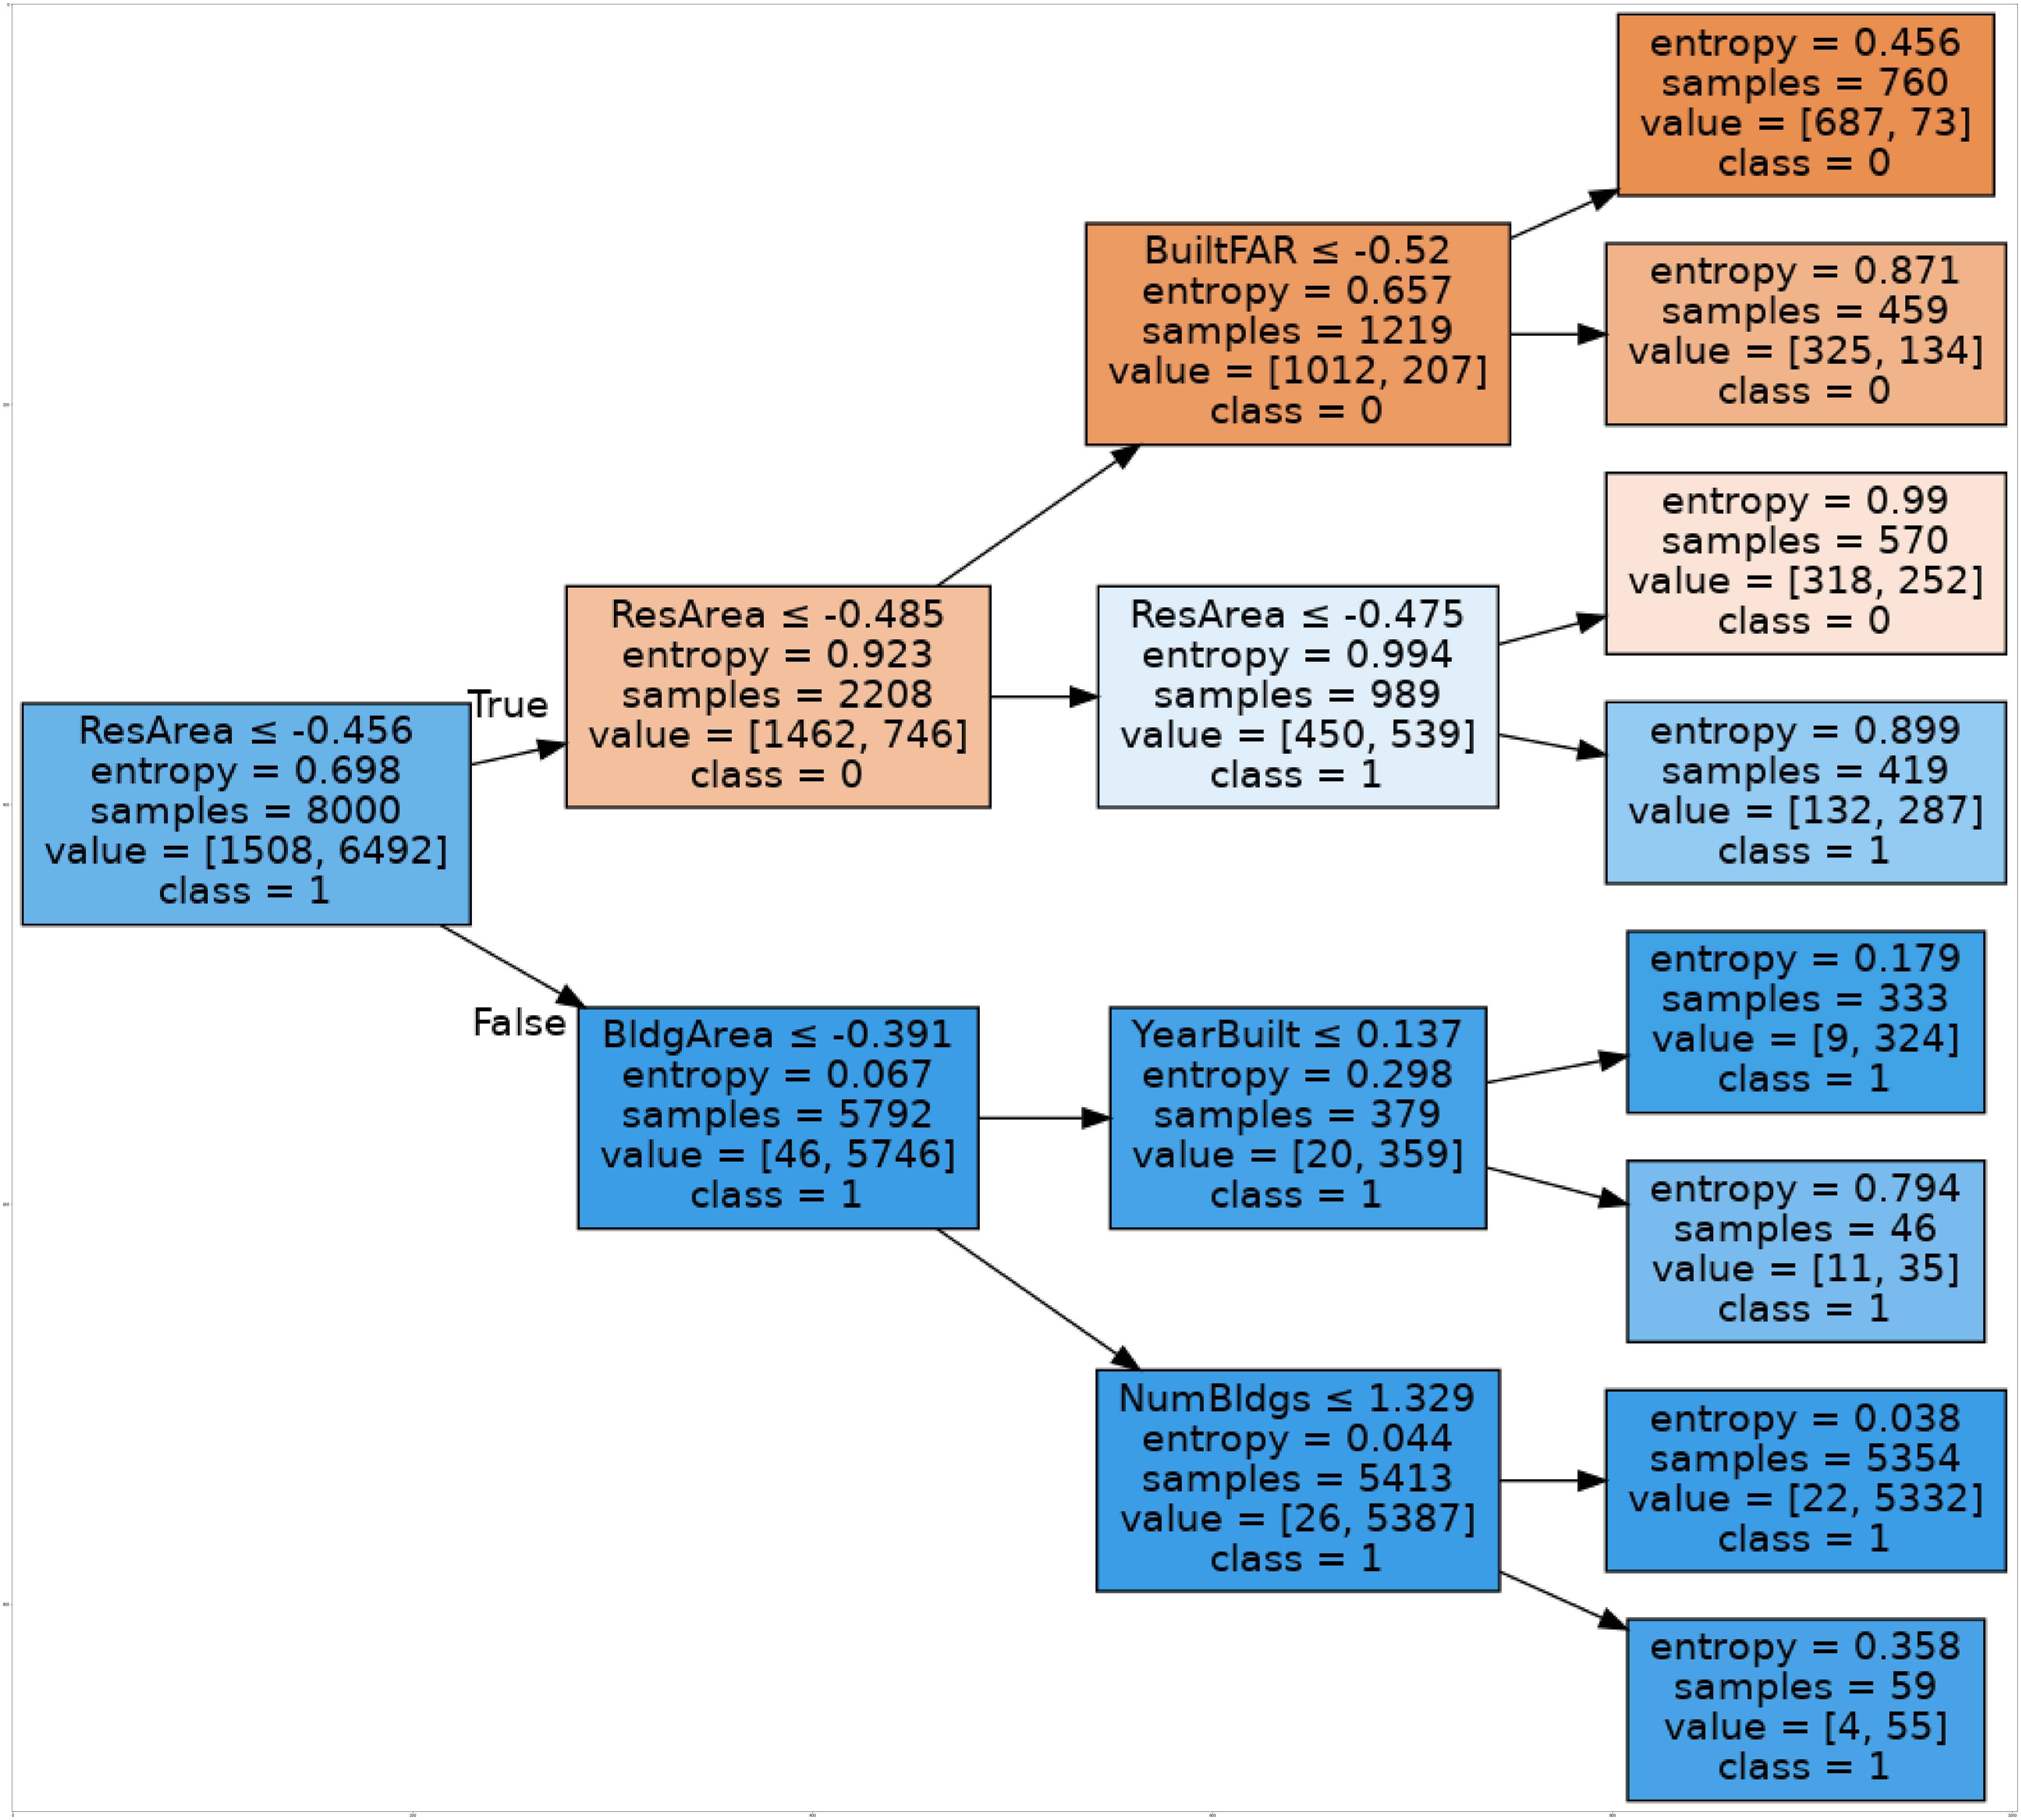

In [221]:
max_depth = 3
y = train = y_train.astype("str")
Tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
Tree.fit(X_train, y_train)
yhat = drugTree.predict(X_val)
Acc_DT = metrics.accuracy_score(y_val, yhat)

dot_data = StringIO()
filename = "tree.png"
featureNames = X.columns
out = tree.export_graphviz(Tree, feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True, special_characters=True, rotate=True) #Creates the Dot data and stores it in dot_data object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) #Load graph as defined by data in DOT format (dot_data.getvalue()) into a Dot class
graph.write_png(filename) # Gives the name of the file to graph.
img = mpimg.imread(filename) #Read an image file (calling it by its filename) into an array (the argument admits the file, the URL, or the filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest') #Display data as an image
y_train = y_train.astype("int")

Support vector machine

In [223]:
from sklearn import svm
kernel = ["linear", "poly", "rbf", "sigmoid"]
dict = {}
max_i = 0
for i, ker in enumerate(kernel):
    svo = svm.SVC(kernel=ker)
    svo.fit(X_train, y_train)
    yhat = svo.predict(X_val)
    Acc = metrics.accuracy_score(y_val, yhat)
    print("Accuracy with", ker, ": %.3f" % Acc)
    dict[ker] = Acc 
    if Acc >= max(dict.values()):
        max_i = i
print("\nBest kernel:", kernel[max_i])

Accuracy with linear : 0.918


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy with poly : 0.910


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy with rbf : 0.918


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy with sigmoid : 0.869

Best kernel: rbf


In [225]:
svo = svm.SVC(kernel= kernel[max_i])
svo.fit(X_train, y_train)
yhat = svo.predict(X_val)

#J_SVM = metrics.jaccard_similarity_score(y_val, yhat)
#print("Jaccard Index: %.3f" % J_SVM)
#f1_SVM = metrics.f1_score(y_val, yhat, average="micro")
#print("F1-score: %.3f" % f1_SVM)
Acc = metrics.accuracy_score(y_val, yhat)
print("Accuracy: %.3f" % Acc)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.918


Logistic Regression

In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
#valid solver values {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
dict = {}
max_i = 0
for i, sol in enumerate(solver):
    LR = LogisticRegression(C=0.01, solver=sol)
    LR.fit(X_train, y_train)
    yhat = LR.predict(X_val)
    Acc = metrics.accuracy_score(y_val, yhat)
    print("Accuracy with", sol, ": %.3f" % Acc)
    dict[sol] = Acc
    if Acc >= max(dict.values()):
        max_i = i
print("\nBest solver method:", solver[max_i])

Accuracy with newton-cg : 0.915
Accuracy with lbfgs : 0.915
Accuracy with liblinear : 0.904


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy with sag : 0.915
Accuracy with saga : 0.915

Best solver method: sag


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [228]:
LR = LogisticRegression(C=0.01, solver="sag")
LR.fit(X_train, y_train)
yhat = LR.predict(X_val)
display(set(y_val)) # Get the labels in same order as probability values
yhat_prob = LR.predict_proba(X_val)

#print(yhat_prob[0:5])
Acc = metrics.accuracy_score(y_val, yhat)
print("\nAccuracy: %.3f" % Acc)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{0, 1}


Accuracy: 0.915


# Model Evaluation

In [239]:
from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

In [240]:
def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1

In [236]:
# Get test data
print(df.shape)
df3 = df.drop(["YCoord", "XCoord", "Longitude", "Latitude", "Address"], axis=1)
print(df3.shape)
df3 = df3.dropna()
print(df3.shape)
df3 = df3.sample(frac=1, random_state=8)[0:15000]
print(df3.shape)
df3["Complaint"].value_counts()

X_test = df3.drop(["Complaint"], axis=1)
y_test = df3["Complaint"]
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:1]

(402522, 23)
(402522, 18)
(402193, 18)
(15000, 18)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


array([[-0.67230792, -0.40134128, -1.11006615, -0.18424614, -1.38899956,
         0.31822426, -0.07413889, -0.26591729, -0.12961367, -1.10997807,
        -0.03873107, -0.7044199 , -1.26597477, -0.28860989,  0.08967868,
        -0.53725848,  0.20342201]])

KNN

In [241]:
yhat = neigh.predict(X_test)

print("KNN")
Acc = metrics.accuracy_score(y_test, yhat)
print("Accuracy: %.6f" % Acc)
Jaccard = jaccard_index(yhat, y_test)
print("Jaccard: %.6f" % Jaccard)
f1 = metrics.f1_score(y_test, yhat, average="micro")
print("F1-score: %.6f" % f1)

Results = list(range(4))
Results[0] = ["KNN", Acc, Jaccard, f1]

KNN
Accuracy: 0.915000
Jaccard: 0.843318
F1-score: 0.915000


Decision Tree

In [247]:
y_test = y_test.astype("str")
yhat = Tree.predict(X_test)
print("Decision Tree")
Acc = metrics.accuracy_score(y_test, yhat)
print("Accuracy: %.6f" % Acc)
Jaccard = jaccard_index(yhat, y_test)
print("Jaccard: %.6f" % Jaccard)
f1 = metrics.f1_score(y_test, yhat, average="micro")
print("F1-score: %.6f" % f1)
y_test = y_test.astype("int")

Results[1] = ["Decision Tree", Acc, Jaccard, f1]

Decision Tree
Accuracy: 0.824533
Jaccard: 0.701452
F1-score: 0.824533


SVM

In [248]:
yhat = svo.predict(X_test)

print("Support Vector Machine")
Acc = metrics.accuracy_score(y_test, yhat)
print("Accuracy: %.6f" % Acc)
Jaccard = jaccard_index(yhat, y_test)
print("Jaccard: %.6f" % Jaccard)
f1 = metrics.f1_score(y_test, yhat, average="micro")
print("F1-score: %.6f" % f1)

Results[2] = ["SVM", Acc, Jaccard, f1]

Support Vector Machine
Accuracy: 0.906933
Jaccard: 0.829715
F1-score: 0.906933


Logistic Regression

In [251]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print("Logistic Regression")
Acc = metrics.accuracy_score(y_test, yhat)
print("Accuracy: %.6f" % Acc)
Jaccard = jaccard_index(yhat, y_test)
print("Jaccard: %.6f" % Jaccard)
f1 = metrics.f1_score(y_test, yhat, average="micro")
print("F1-score: %.6f" % f1)
Logloss = metrics.log_loss(y_test, yhat_prob)
print("LogLoss: %.6f" % Logloss)

Results[3] = ["Logistic Regression", Acc, Jaccard, f1, Logloss]

Logistic Regression
Accuracy: 0.908800
Jaccard: 0.832845
F1-score: 0.908800
LogLoss: 0.204060


In [252]:
Report = pd.DataFrame(Results, columns=["Algorithm", "Accuracy", "Jaccard", "F1-score", "LogLoss"])
Report

,Algorithm,Accuracy,Jaccard,F1-score,LogLoss
0,KNN,0.915000,0.843318,0.915000,NaN
1,Decision Tree,0.824533,0.701452,0.824533,NaN
2,SVM,0.906933,0.829715,0.906933,NaN
3,Logistic Regression,0.908800,0.832845,0.908800,0.20406


Conclusion: The best model with test data is K-nearest neighbours with k = 5